In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
matches_df=pd.read_csv ("/content/IPL Matches 2008-2020.csv")
balls_df=pd.read_csv ("/content/IPL Ball-by-Ball 2008-2020.csv")

In [ ]:
matches_df.head()


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
matches_df['date'] = pd.to_datetime(matches_df['date'])
matches_df['season']=matches_df['date'].dt.year

In [ ]:
# 1.
matches_df.groupby('season')['id'].count()

,id
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


In [ ]:
# 2. How many runs were scored in each season?


In [ ]:
merged_df=balls_df.merge(matches_df[["id","season"]],on ="id")
merged_df

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,season
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,2020
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,2020
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians,2020
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians,2020


In [ ]:
runs_per_season = merged_df.groupby("season")["total_runs"].sum()

In [ ]:
runs_per_season

,total_runs
season,
2008,17937
2009,16320
2010,18864
2011,21154
2012,22453
2013,22541
2014,18909
2015,18332
2016,18862


In [ ]:
# 3. What were the runs scored per match in different seasons?

In [ ]:
runs=merged_df.groupby(["season","id"])["total_runs"].sum()

In [ ]:
runs

season  id     
2008    335982     304
        335983     447
        335984     261
        335985     331
        335986     222
                  ... 
2020    1216547    402
        1237177    343
        1237178    263
        1237180    361
        1237181    313
Name: total_runs, Length: 816, dtype: int64

In [ ]:
# 4. Who has umpired the most?

In [ ]:
umpire = matches_df.groupby('umpire1')['id'].count().sort_values(ascending=False)

In [ ]:
umpire.idxmax()

'HDPK Dharmasena'

In [ ]:
u1 = matches_df['umpire1'].value_counts() + matches_df['umpire2'].value_counts()
u1.idxmax()

'S Ravi'

In [ ]:
# 5. Which team has won the most tosses?

In [ ]:
matches_df.groupby('toss_winner')['id'].count().idxmax()

'Mumbai Indians'

In [ ]:
# 6. What does the team decide after winning the toss?

In [ ]:
matches_df.groupby('toss_decision')['id'].count()

,id
toss_decision,
bat,320
field,496


In [ ]:
#create barplot for above

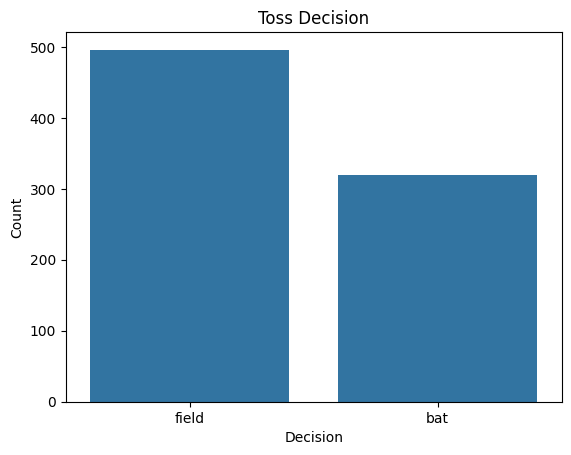

In [ ]:
sns.barplot(x=matches_df['toss_decision'].value_counts().index, y=matches_df['toss_decision'].value_counts().values)
plt.title('Toss Decision')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()



In [ ]:
# 7. How does the toss decision vary across seasons?

In [ ]:
matches_df.groupby(['season','toss_decision'])['id'].count()

season  toss_decision
2008    bat              26
        field            32
2009    bat              35
        field            22
2010    bat              39
        field            21
2011    bat              25
        field            48
2012    bat              37
        field            37
2013    bat              45
        field            31
2014    bat              19
        field            41
2015    bat              25
        field            34
2016    bat              11
        field            49
2017    bat              11
        field            48
2018    bat              10
        field            50
2019    bat              10
        field            50
2020    bat              27
        field            33
Name: id, dtype: int64

In [ ]:
# 8. Does winning the toss imply winning the game?

In [ ]:
matches_df.groupby('toss_winner')['winner'].value_counts()

toss_winner          winner                     
Chennai Super Kings  Chennai Super Kings            61
                     Mumbai Indians                  7
                     Kings XI Punjab                 5
                     Rajasthan Royals                5
                     Royal Challengers Bangalore     5
                                                    ..
Sunrisers Hyderabad  Mumbai Indians                  4
                     Rajasthan Royals                3
                     Kings XI Punjab                 2
                     Delhi Capitals                  1
                     Rising Pune Supergiant          1
Name: count, Length: 127, dtype: int64

In [ ]:
# 9. How many times has the chasing team won the match?

In [ ]:
chase = matches_df[matches_df['team2']==matches_df['winner']]
chase.shape[0]

367

In [ ]:
# 10. Which all teams had won this tournament?

In [ ]:
# 11. Which team has played the most number of matches?

In [ ]:
matches_played = matches_df.groupby('team1')['id'].count() + matches_df.groupby('team2')['id'].count()
matches_played.idxmax()

'Mumbai Indians'

In [ ]:
# 12. Which team has won the most number of times?

In [ ]:
c = matches_df.groupby('winner')['id'].count()
c.idxmax()

'Mumbai Indians'

In [ ]:
# 13. Which team has the highest winning percentage?

In [ ]:
highest_winning_percentage = (matches_df.groupby('winner')['id'].count() / matches_df.groupby('winner')['id'].count().sum()) * 100
highest_winning_percentage.idxmax()

'Mumbai Indians'

In [ ]:
# 14. Is there any lucky venue for a particular team?

In [ ]:
lucky_venue=matches_df.groupby('venue')['id'].count()
lucky_venue.idxmax()

'Eden Gardens'

In [ ]:
# 15. Innings wise comparison between teams

In [ ]:
innings_comparison = merged_df.groupby(['inning','batting_team'])['total_runs'].sum()
innings_comparison

inning  batting_team               
1       Chennai Super Kings            15344
        Deccan Chargers                 6765
        Delhi Capitals                  2860
        Delhi Daredevils               11247
        Gujarat Lions                   2267
        Kings XI Punjab                15710
        Kochi Tuskers Kerala            1009
        Kolkata Knight Riders          14842
        Mumbai Indians                 18338
        Pune Warriors                   2973
        Rajasthan Royals               11236
        Rising Pune Supergiant          1304
        Rising Pune Supergiants         1123
        Royal Challengers Bangalore    15774
        Sunrisers Hyderabad            11277
2       Chennai Super Kings            13019
        Deccan Chargers                 4698
        Delhi Capitals                  2436
        Delhi Daredevils               13038
        Gujarat Lions                   2589
        Kings XI Punjab                14307
        Kochi Tuskers Kerala             892
        Kolkata Knight Riders          14541
        Mumbai Indians                 13948
        Pune Warriors                   3385
        Rajasthan Royals               13271
        Rising Pune Supergiant          1166
        Rising Pune Supergiants          940
        Royal Challengers Bangalore    14440
        Sunrisers Hyderabad             8055
Name: total_runs, dtype: int64

In [ ]:
# 16. Which team has scored the most number of 200+ scores?

In [ ]:
most_scored_runs =merged_df.groupby('batting_team')['total_runs'].sum()
most_scored_runs[most_scored_runs>=200].idxmax()

'Mumbai Indians'

In [ ]:
# 17. Which team has conceded 200+ scores the most?

In [ ]:
conceded = merged_df.